In [288]:
#Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
#Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
#Разделите данные на выборку для обучения и тестирования
#Постройте модель LDA
#Визуализируйте предсказания для тестовой выборки и центры классов
#Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
#Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from pylab import rcParams
rcParams['figure.figsize'] = 17,8

In [289]:
iris = load_iris()
[print(el,'\n',iris[el]) for el in iris]

data 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9

[None, None, None, None, None, None, None]

In [290]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df_class = iris.target
df.drop(columns = ['petal length (cm)','petal width (cm)'], axis = 1, inplace = True)


In [291]:
df.describe()

,sepal length (cm),sepal width (cm)
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

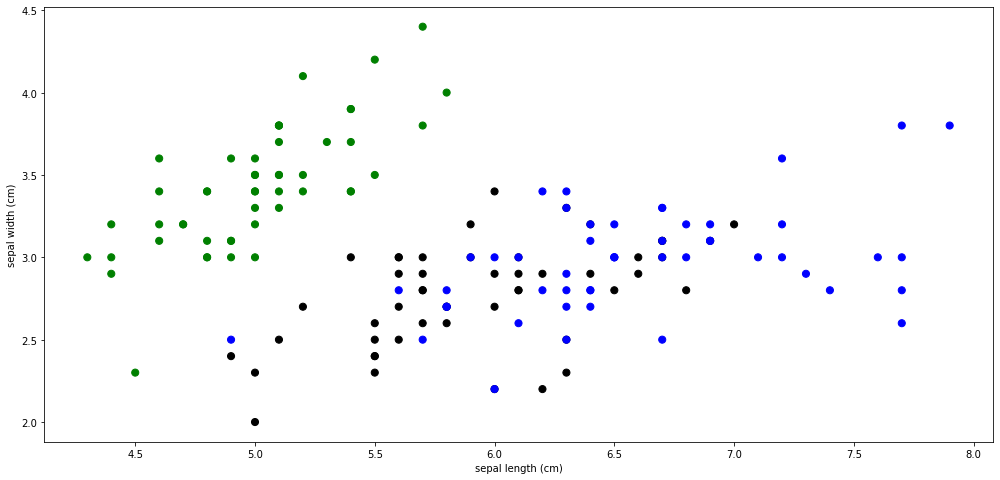

In [292]:
col = pd.Series(df_class).map({0:'green', 1:'black',2:'blue'})
df.iloc[:,0:2].plot(kind = 'scatter', x = 'sepal length (cm)', y = 'sepal width (cm)', c = col,s = 50)

### LDA

In [293]:
#Разделение на выборку и обучение
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(df, df_class, test_size=0.25, random_state=27)

In [294]:
#обучение
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [295]:
lda.predict(X_test)

array([2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0,
       1, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2])

In [296]:
#точность
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7894736842105263

In [297]:
#центроилы классов
lda.means_

array([[5.01463415, 3.45609756],
       [5.85555556, 2.73888889],
       [6.56857143, 2.98      ]])

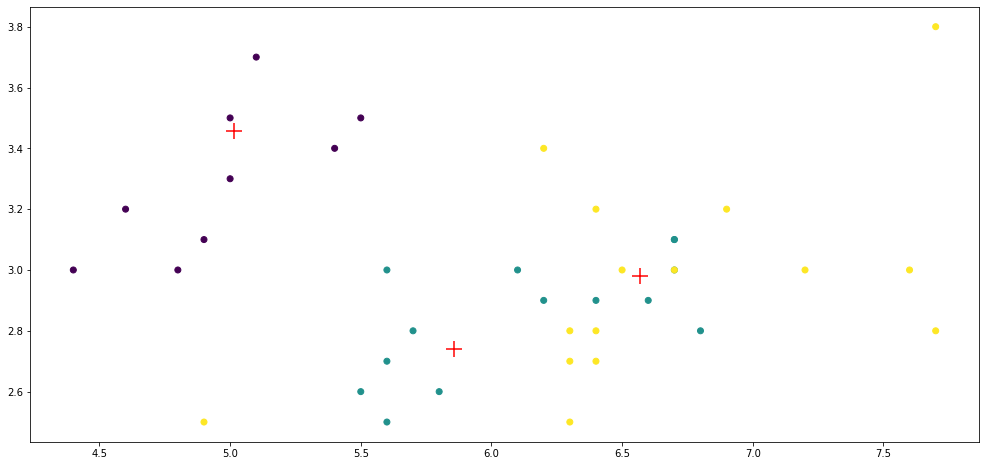

In [298]:
#визуализация центров для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0],lda.means_[:, 1],c='r', s=250, marker='+')
plt.show()

### Кластеры

In [299]:
df.describe()

,sepal length (cm),sepal width (cm)
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [300]:
from sklearn.cluster import KMeans

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


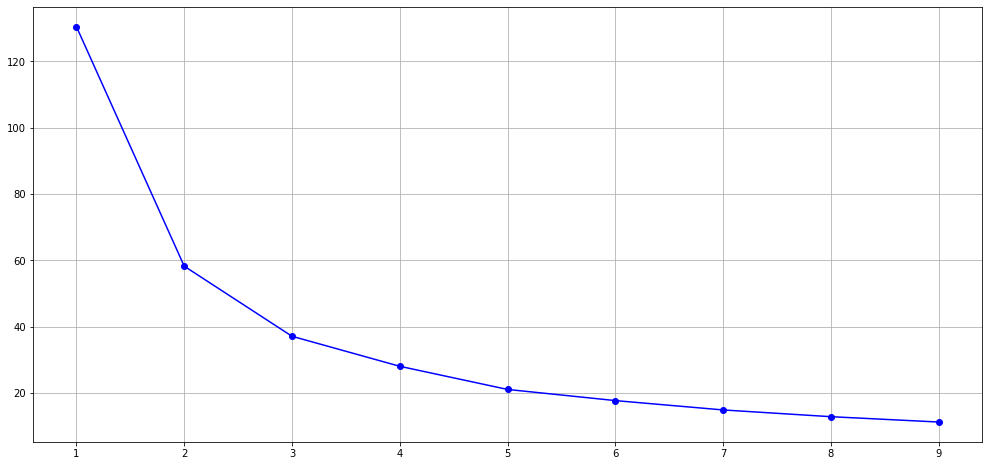

In [301]:
inertia = []
clust_range = range(1,10)

for clust in clust_range:
    kmeans = KMeans(n_clusters=clust)
    clusters = kmeans.fit_predict(df)
    inertia.append(kmeans.inertia_)
    

plt.plot(clust_range, inertia, '-bo')
plt.grid()

#оптимум - 2)


In [302]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(df)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

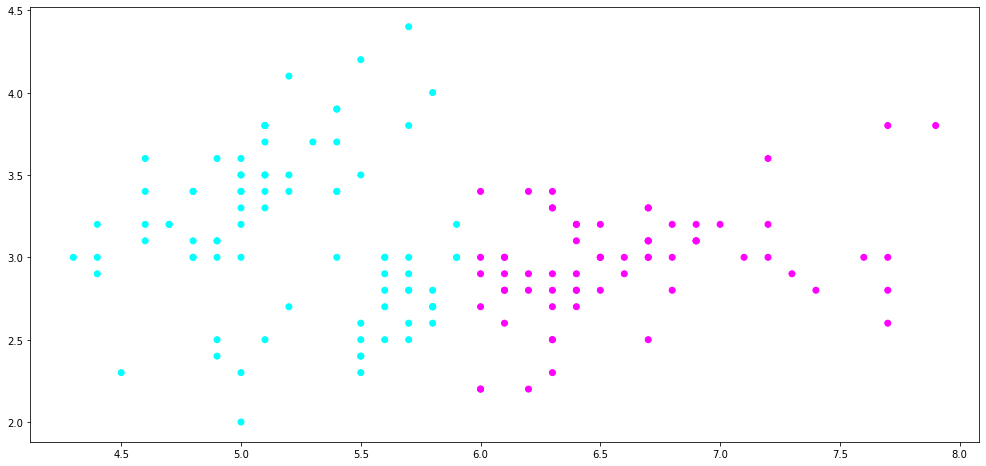

In [303]:
plt.scatter(x = df['sepal length (cm)'], y = df['sepal width (cm)'], cmap='cool', c=clusters)

In [304]:
#Иерархическая
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=2)
clusters_agg = aglo.fit_predict(df)
clusters_agg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

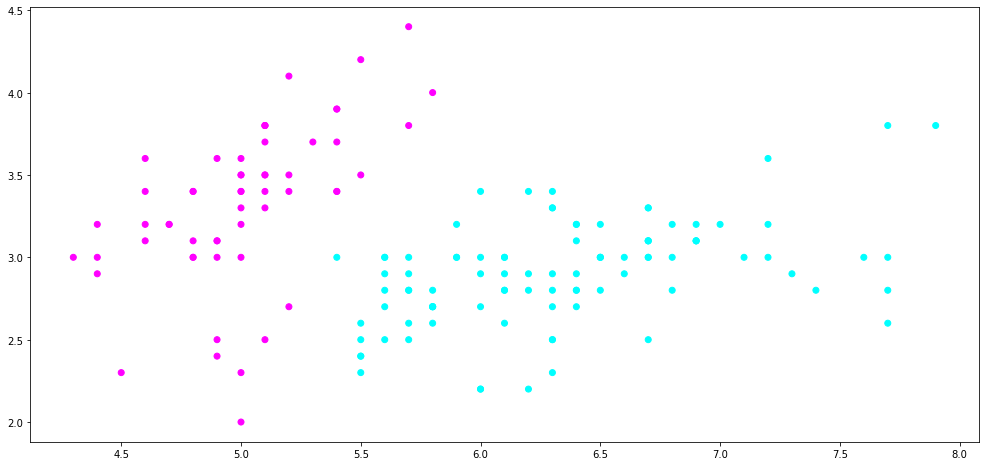

In [305]:
plt.scatter(x = df['sepal length (cm)'], y = df['sepal width (cm)'], cmap='cool', c=clusters_agg)